<a href="https://colab.research.google.com/github/dhyannn/ML_project/blob/main/2348514_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing required libraries and packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
#from  sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### Importing the dataset

In [ ]:
df = pd.read_csv("Water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
# Viewing the data dimensions
df.shape

(3276, 10)

- The dataset has 3276 rows in 10 columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


- The dataset has only numerical variables
- The target variable: Potability is nominal

In [ ]:
# checking for null values in the dataset
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

- There are some missing values in the dataset

In [ ]:
# finding percentage of null values
percent_missing=df.isnull().sum()*100/len(df)
print(percent_missing)

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64


### Dealing with missing values

#### Missing values: pH Value
- Domain study:
- Water with a low pH is more acidic, while water with a higher pH is harder or more alkaline, meaning it is able to neutralize acids.
- The pH scale measures substances on a scale from 1 to 14, with 7 being neutral.

In [ ]:
print('Conditonal Statements to fill in the Missing Values of PH Value Column')

print("\n")
print('if Potability = 0 and Hardness <= 150')
condition_1_mean_ph = df[(df['Potability'] == 0) & (df['Hardness'] <= 150)][['ph']].mean()
print("PH VALUE : {:.4f}".format(float(condition_1_mean_ph)))

print("\n")
print('if Potability = 0 and Hardness > 150')
condition_2_mean_ph = df[(df['Potability'] == 0) & (df['Hardness'] > 150)][['ph']].mean()
print("PH VALUE : {:.4f}".format(float(condition_2_mean_ph)))


print("\n")
print('if Potability = 1 and Hardness <= 150')
condition_3_mean_ph = df[(df['Potability'] == 0) & (df['Hardness'] <= 150)][['ph']].mean()
print("PH VALUE : {:.4f}".format(float(condition_3_mean_ph)))

print("\n")
print('if Potability = 1 and Hardness > 150')
condition_4_mean_ph = df[(df['Potability'] == 0) & (df['Hardness'] > 150)][['ph']].mean()
print("PH VALUE : {:.4f}".format(float(condition_4_mean_ph)))

Conditonal Statements to fill in the Missing Values of PH Value Column


if Potability = 0 and Hardness <= 150
PH VALUE : 6.7220


if Potability = 0 and Hardness > 150
PH VALUE : 7.1125


if Potability = 1 and Hardness <= 150
PH VALUE : 6.7220


if Potability = 1 and Hardness > 150
PH VALUE : 7.1125


In [ ]:
for x in range(0, len(df)) :
    if (pd.isnull(df['ph'][x]) == True) :
        if ((df['Potability'][x] == 0) & (df['Hardness'][x] <= 150)) : df['ph'][x] = condition_1_mean_ph
        elif ((df['Potability'][x] == 0) & (df['Hardness'][x] > 150)) : df['ph'][x] = condition_2_mean_ph
        elif ((df['Potability'][x] == 1) & (df['Hardness'][x] <= 150)) : df['ph'][x] = condition_3_mean_ph
        elif ((df['Potability'][x] == 1) & (df['Hardness'][x] > 150)) : df['ph'][x] = condition_4_mean_ph

<ipython-input-8-8a422eb23e4b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elif ((df['Potability'][x] == 0) & (df['Hardness'][x] > 150)) : df['ph'][x] = condition_2_mean_ph
<ipython-input-8-8a422eb23e4b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if ((df['Potability'][x] == 0) & (df['Hardness'][x] <= 150)) : df['ph'][x] = condition_1_mean_ph
<ipython-input-8-8a422eb23e4b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elif

#### Missing value: Sulphate

- Seawater contains roughly 2,700 milligrammes per litre (mg/L) of sulphate. Most freshwater supplies have concentrations of 3 to 30 mg/L, while some geographic regions have significantly greater quantities (1000 mg/L).

- Note : Sadly the Dataset only contains data of Sulfate ranging from 129 to 481 (mg/L) so we will just get mean of the rows that are potable and not potable which has a difference of 2 (mg/L)

In [ ]:
print('Conditonal Statements to fill in the Missing Values of Sulfate Column')

print("\n")
print('if Potability = 0')
condition_1_mean_sulfate = df[(df['Potability'] == 0)][['Sulfate']].mean()
print("Sulfate : {:.4f}".format(float(condition_1_mean_sulfate)))

print("\n")
print('if Potability = 1')
condition_2_mean_sulfate = df[(df['Potability'] == 1)][['Sulfate']].mean()
print("Sulfate : {:.4f}".format(float(condition_2_mean_sulfate)))

Conditonal Statements to fill in the Missing Values of Sulfate Column


if Potability = 0
Sulfate : 334.5643


if Potability = 1
Sulfate : 332.5670


In [ ]:
for x in range(0, len(df)) :
    if (pd.isnull(df['Sulfate'][x]) == True) :
        if (df['Potability'][x] == 0) : df['Sulfate'][x] = condition_1_mean_sulfate
        else : df['Sulfate'][x] = condition_2_mean_sulfate


<ipython-input-10-4b3e61a4eb35>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if (df['Potability'][x] == 0) : df['Sulfate'][x] = condition_1_mean_sulfate
<ipython-input-10-4b3e61a4eb35>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  else : df['Sulfate'][x] = condition_2_mean_sulfate


#### Missing Values: Trihalomethanes

- THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

In [ ]:
df['Trihalomethanes'].fillna(value = df['Trihalomethanes'].mean() , inplace = True)

In [ ]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
count=df.Potability.value_counts()
count

0    1998
1    1278
Name: Potability, dtype: int64

- The target variable is slightly imbalanced

Text(0.5, 1.0, 'percentage of potability')

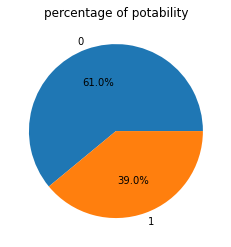

In [ ]:
plt.pie(count,labels=count.index,autopct='%1.1f%%')
plt.title('percentage of potability')
#0-not potable
#1-potable

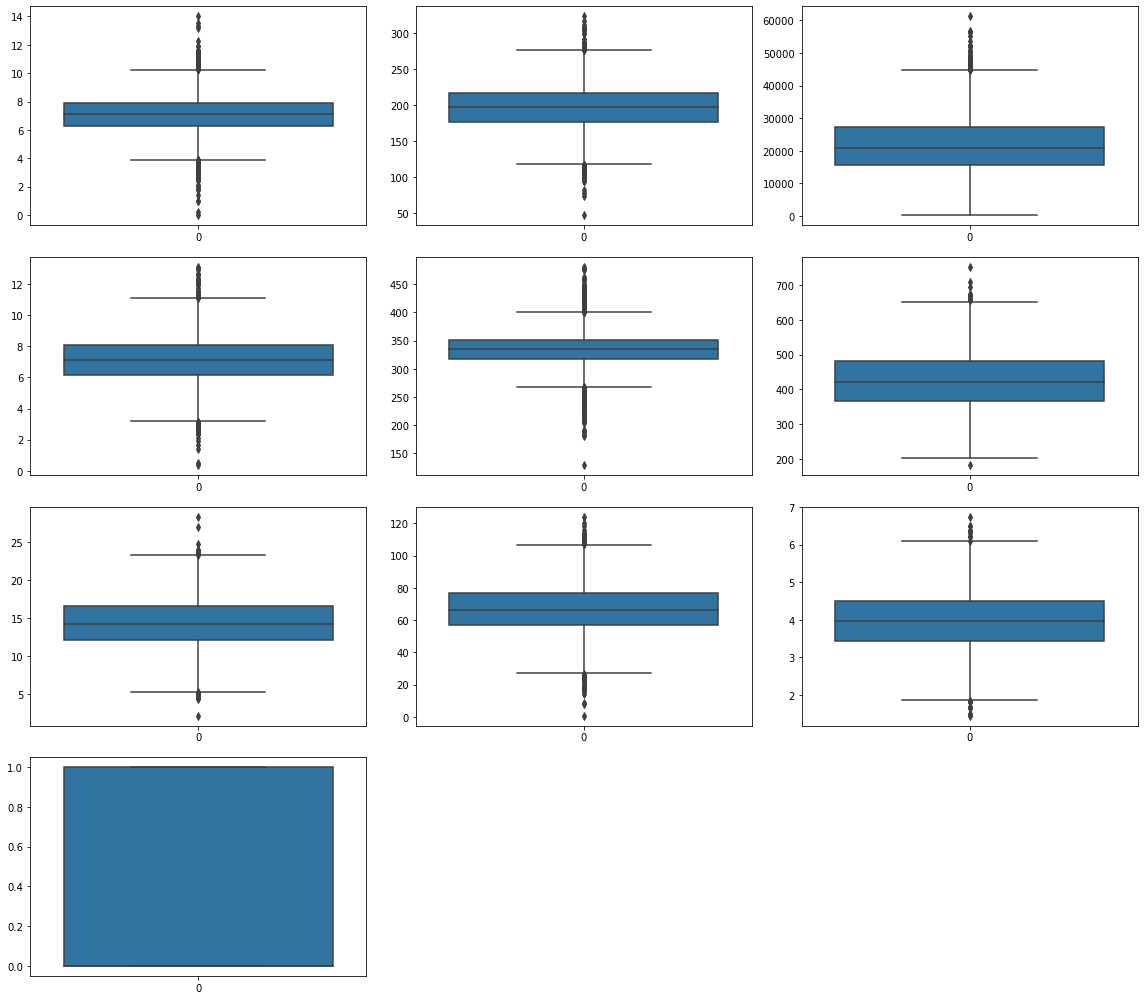

In [ ]:
plt.figure(figsize=(16,14))
for i,col in enumerate(df.columns):
    plt.subplot(4,3,i+1)
    sns.boxplot(data=df[col])

    plt.tight_layout()

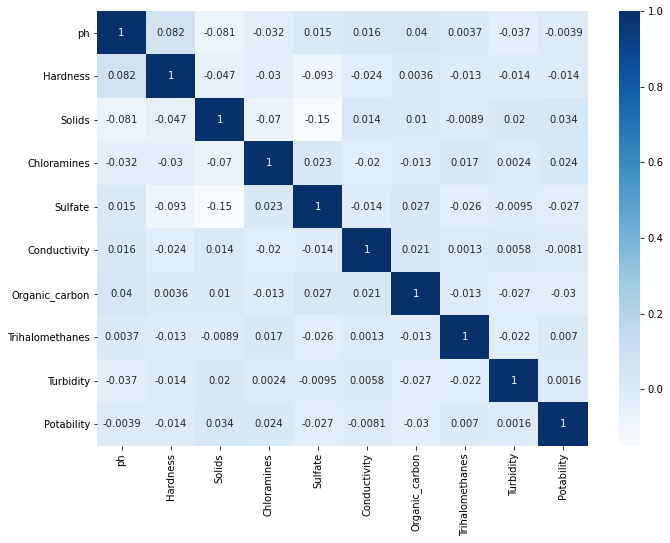

In [ ]:
# Correlation matrix:
plt.figure(figsize=(11,8))
sns.heatmap(df.corr(), annot=True,cmap='Blues')
plt.show()

- The data shows very less correlation between all the features.
- Some features may be skewed, we will correct that in later stages

In [ ]:
corr_matrix=df.corr()
corr_matrix['Hardness'].sort_values(ascending=False)


Hardness           1.000000
ph                 0.081670
Organic_carbon     0.003610
Trihalomethanes   -0.012690
Potability        -0.013837
Turbidity         -0.014449
Conductivity      -0.023915
Chloramines       -0.030054
Solids            -0.046899
Sulfate           -0.092718
Name: Hardness, dtype: float64

- pH and Hardness are the most correlated columns
- Although, the correlation is 0.081

C:\Users\PRIYANSHU\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


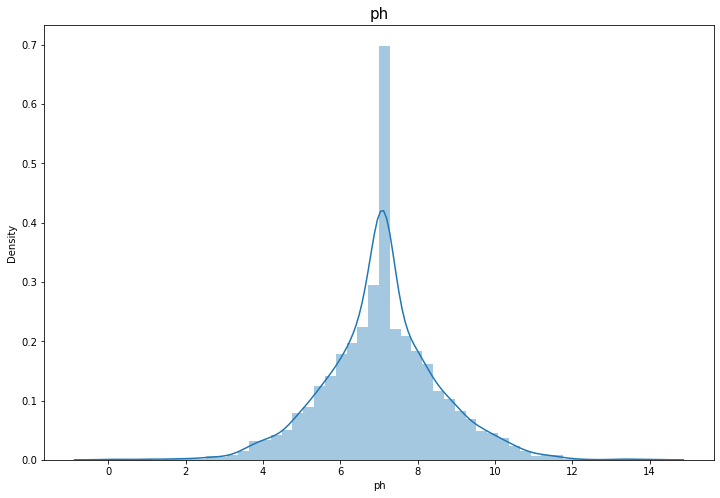

C:\Users\PRIYANSHU\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


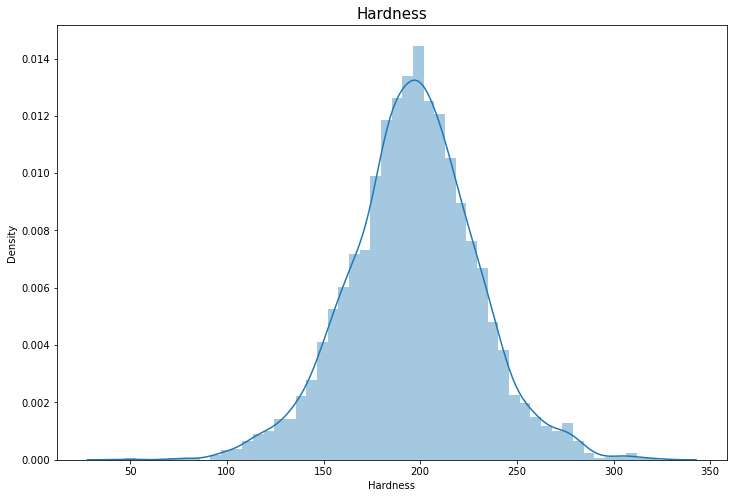

C:\Users\PRIYANSHU\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


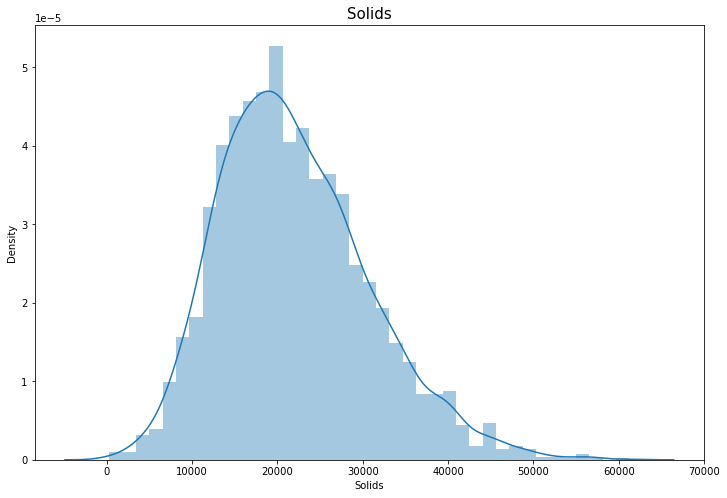

C:\Users\PRIYANSHU\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


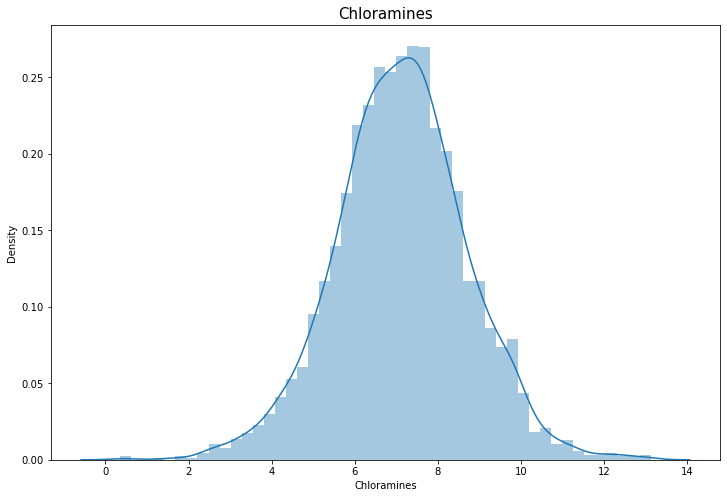

C:\Users\PRIYANSHU\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


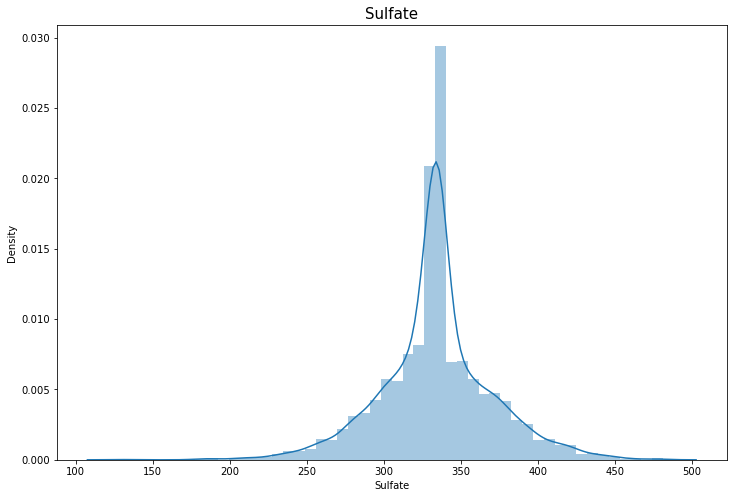

C:\Users\PRIYANSHU\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


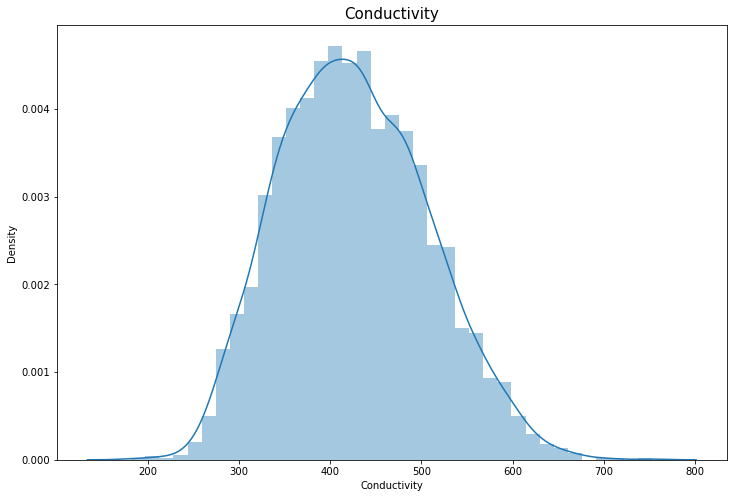

C:\Users\PRIYANSHU\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


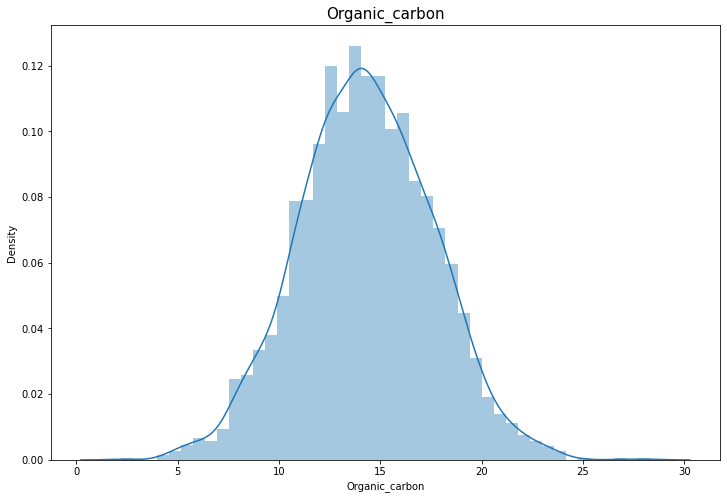

C:\Users\PRIYANSHU\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


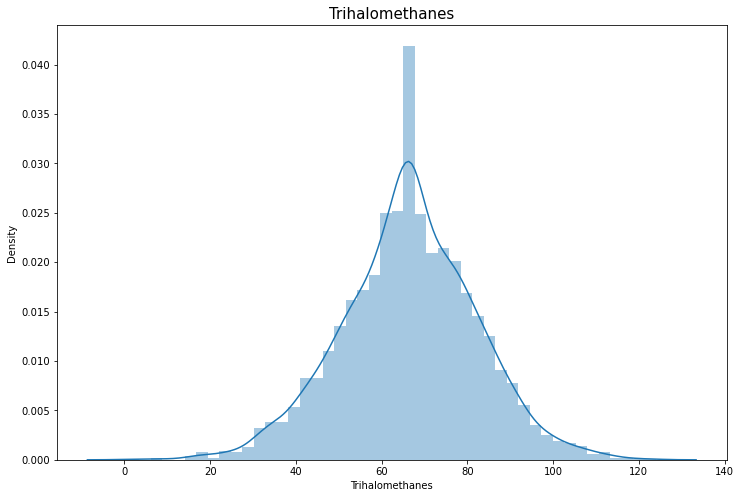

C:\Users\PRIYANSHU\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


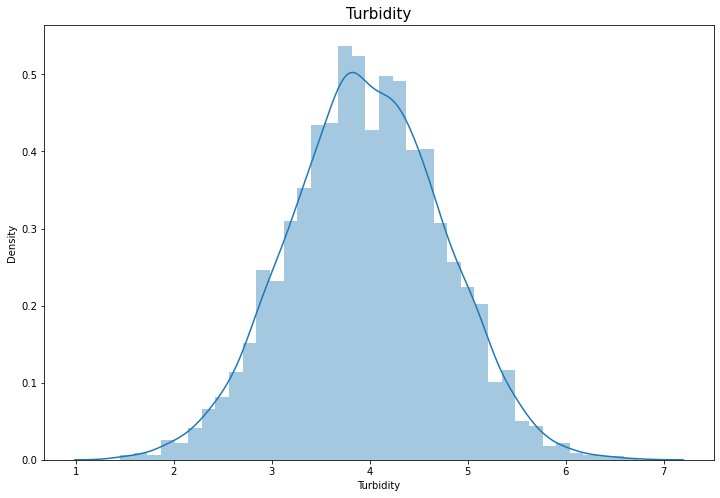

In [ ]:
# Plotting distribution for each variable
for col in df.drop("Potability", axis=1).columns:
    plt.figure(figsize=(12,8))
    sns.distplot(df[col])
    plt.title(f"{col}", size=15)
    plt.show()

- The above graphs show that some the distributions are skewed.
- 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity','Organic_carbon', 'Trihalomethanes', 'Turbidity' columns are skewed. So, we will correct it
- The outliers are minimal, hence can be left untreated for the time being

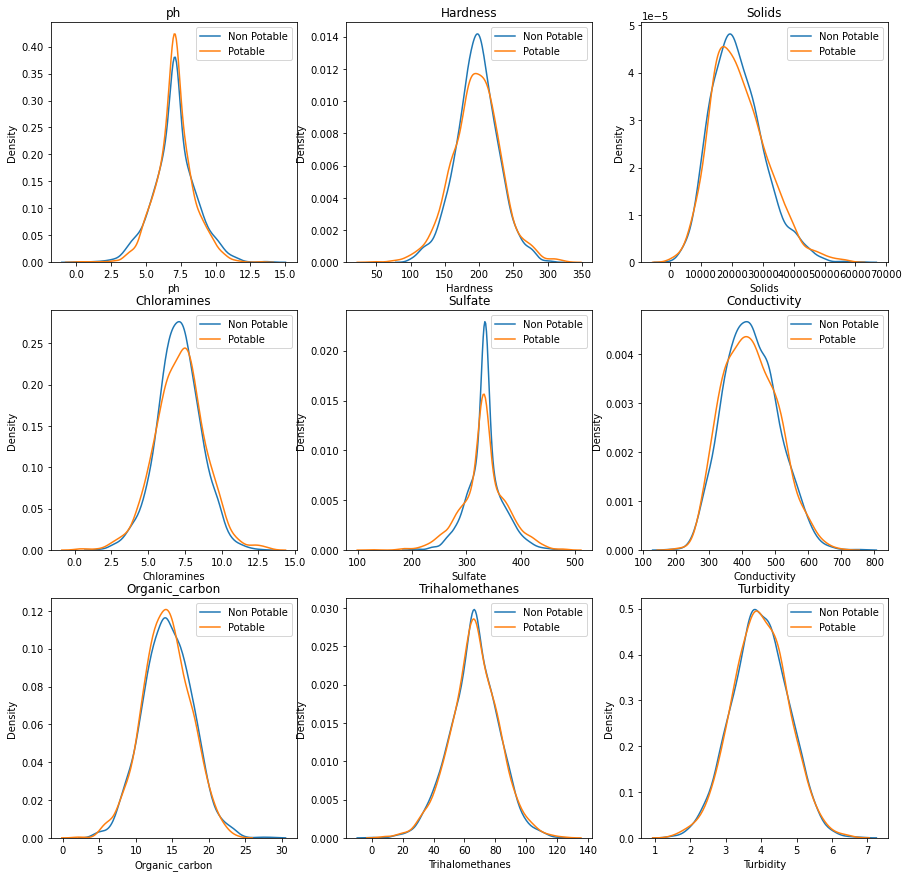

In [ ]:
# Plotting each variable: comparing Potable and Non-potable
non_potable = df.query("Potability == 0")
potable = df.query("Potability == 1")

plt.figure(figsize = (15,15))
for ax, col in enumerate(df.columns[:9]):
    plt.subplot(3,3, ax + 1)
    plt.title(col)
    sns.kdeplot(x = non_potable[col], label = "Non Potable")
    sns.kdeplot(x = potable[col], label = "Potable")
    plt.legend()
plt.show()

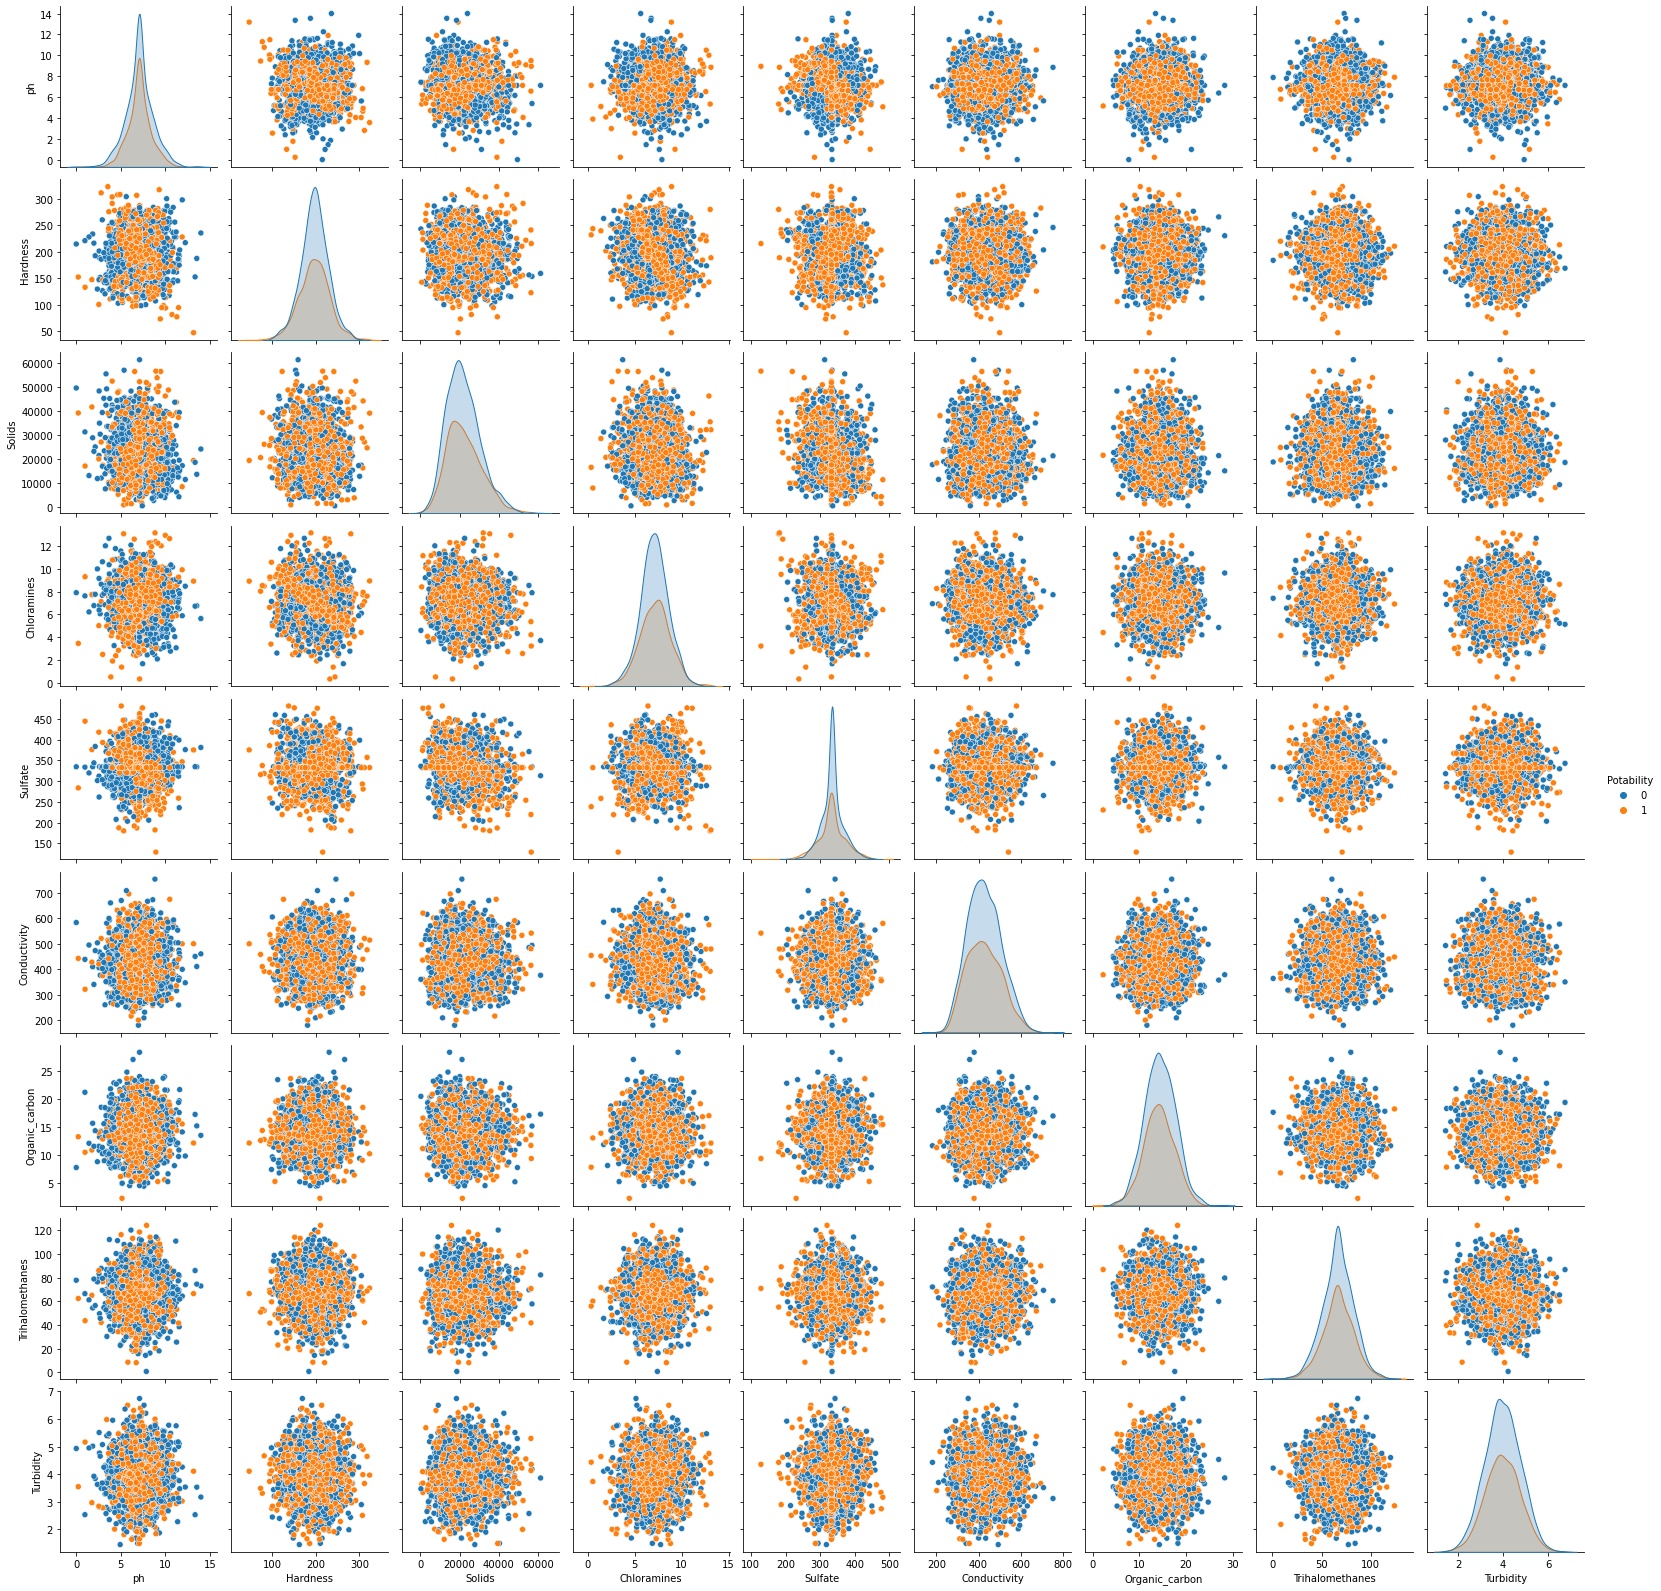

In [ ]:
sns.pairplot(df, hue="Potability")

In [ ]:
# Checking skewed variables
skew_val = df.skew().sort_values(ascending=False)
skew_val

Solids             0.621634
Potability         0.450784
Conductivity       0.264490
ph                 0.026902
Organic_carbon     0.025533
Turbidity         -0.007817
Chloramines       -0.012098
Hardness          -0.039342
Sulfate           -0.041952
Trihalomethanes   -0.085161
dtype: float64

- Using pandas skew function to check the correlation between the values.
- Values between 0.5 to -0.5 will be considered as the normal distribution else will be skewed depending upon the skewness value.

### Building Classification model: Logistic Regression

In [ ]:
# Defining X and y
X=df.drop('Potability',axis=1) # Contains all columns except Potability
y=df["Potability"]

In [ ]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# print('Balancing the data by SMOTE - Oversampling of Minority level\n')
# smt = SMOTE()
# counter = Counter(y_train)
# print('Before SMOTE', counter)
# X_train, y_train = smt.fit_resample(X_train, y_train)
# counter = Counter(y_train)
# print('\nAfter SMOTE', counter)


# ssc = StandardScaler()

# X_train = ssc.fit_transform(X_train)
# X_test = ssc.transform(X_test)

# modelAccuracy = list()

Balancing the data by SMOTE - Oversampling of Minority level

Before SMOTE Counter({0: 1586, 1: 1034})

After SMOTE Counter({0: 1586, 1: 1586})


- The original class imbalance was not severe enough to warrant SMOTE.
- Oversampling the minority class excessively could have lead to a new imbalance problem in the opposite direction, where the model starts to favor the minority class too much.
- Since logistic regression is sensitive to changes in class distribution,  the decision boundary of the model can shift, leading to different predictions.

In [ ]:
#Fitting Logistic Regression to the training set
from sklearn.linear_model import LogisticRegression
#create object for LogisticRegression

logres=LogisticRegression()

#Training Model
logres.fit(X_train,y_train)

LogisticRegression()

In [ ]:
#Predicting the test set result
testing_pred=logres.predict(X_test)
training_pred=logres.predict(X_train)

In [ ]:
# Training Metrics
training_accuracy = accuracy_score(y_train, training_pred)
training_f1 = f1_score(y_train, training_pred, average = 'weighted')
training_precision = precision_score(y_train, training_pred, average = 'weighted')
training_recall = recall_score(y_train, training_pred, average = 'weighted')

# Testing Metrics

testing_accuracy = accuracy_score(y_test, testing_pred)
testing_f1 = f1_score(y_test, testing_pred, average = 'weighted')
testing_precision = precision_score(y_test, testing_pred, average = 'weighted')
testing_recall = recall_score(y_test, testing_pred, average = 'weighted')

print('Logistic Regression')
print('\n')

print('Training Model Performance Check')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

Logistic Regression


Training Model Performance Check
Accuracy Score : 0.6061
F1 Score : 0.4583
Precision Score : 0.7614
Recall Score : 0.6061


Testing Model Performance Check
Accuracy Score : 0.6280
F1 Score : 0.4846
Precision Score : 0.3944
Recall Score : 0.6280


C:\Users\PRIYANSHU\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import classification_report,accuracy_score
a=accuracy_score(y_test,testing_pred)*100
a

62.80487804878049

In [ ]:
confusion_matrix1=confusion_matrix(y_test,testing_pred)
confusion_matrix1

array([[412,   0],
       [244,   0]], dtype=int64)

### Modelling Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

#creating the object for model
dt=DecisionTreeClassifier(criterion="gini",min_samples_split=10,splitter="best", max_depth = 3)

#train the decision tree by using .fit
dt.fit(X_train,y_train.values.ravel())

DecisionTreeClassifier(max_depth=3, min_samples_split=10)

In [ ]:
training_prediction = dt.predict(X_train)
testing_prediction = dt.predict(X_test)

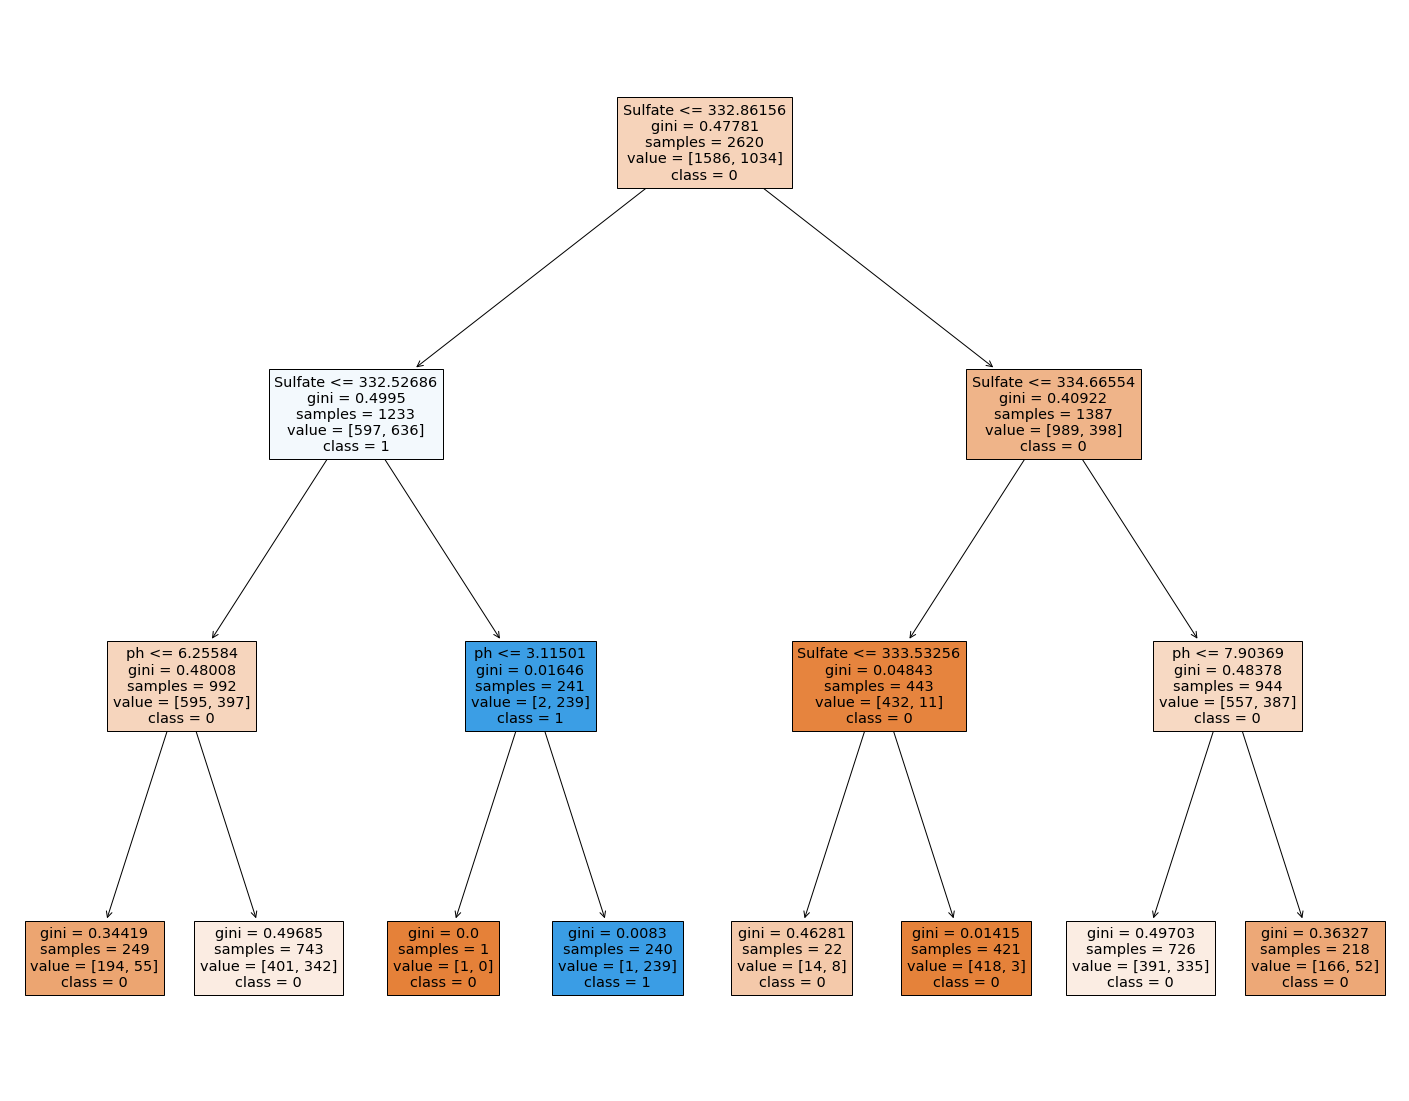

In [ ]:
# Visualizing the Decision Tree
from sklearn import tree
plt.figure(figsize = (25,20))
tree.plot_tree(dt,
               feature_names =  df.columns.tolist()[:-1],
               class_names = ["0", "1"],
               filled = True,
               precision = 5)
plt.show()

- The Root node is Sulphate, this means the most important feature is "Sulphate"

In [ ]:
#Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

#Testing Metrics
testing_accuracy = accuracy_score(y_test, testing_prediction)
testing_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
testing_precision = precision_score(y_test, testing_prediction, average = 'weighted')
testing_recall = recall_score(y_test, testing_prediction, average = 'weighted')

print('Decision Tree (30%)')
print('\n')
print('Training Model Performance Check')
print('Accuracy Score {:.4f}'.format(training_accuracy))
print('F1 Score {:.4f}'.format(training_f1))
print('Precision Score {:.4f}'.format(training_precision))
print('Recall Score {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score {:.4f}'.format(testing_accuracy))
print('F1 Score {:.4f}'.format(testing_f1))
print('Precision Score {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

Decision Tree (30%)


Training Model Performance Check
Accuracy Score 0.7481
F1 Score 0.7282
Precision Score 0.7652
Recall Score 0.7481


Testing Model Performance Check
Accuracy Score 0.7226
F1 Score 0.7018
Precision Score 0.7211
Recall Score : 0.7226


In [ ]:
print(f"Accuracy score={accuracy_score(y_test,testing_prediction)*100}")

Accuracy score=72.2560975609756


In [ ]:
confusion_matrix=confusion_matrix(y_test,testing_prediction)
confusion_matrix

array([[371,  41],
       [141, 103]], dtype=int64)

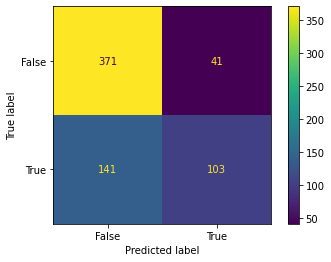

In [ ]:
# Visualization of Confusion Matrix for our prediction
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

- For the domain, False positives are concerning because they can lead to people consuming water that is not safe, potentially causing health issues. Minimizing false positives is essential.

#### Insights:
- The Decision Tree model performs better than the Logistic Regression model in terms of accuracy, F1 score, and precision on both the training and testing datasets.

- However, the Decision Tree model shows signs of overfitting, as indicated by the significant difference between its training and testing accuracy. Overfitting occurs when a model learns to fit the training data too closely and may not generalize well to unseen data.

- If we had to choose between these two models, Decision tree appears to be a better choice. However, the overfitting issue must be addressed by adopting techniques, such as tuning hyperparameters or using ensemble methods like Random Forests to improve generalization to unseen data.